<h2>Import packages and data</h2>

In [1]:
from scipy.io import netcdf
import similarity_measures as sim
import calculations as calc
import comparing as comp
import combining as comb
import plots
import numpy as np
import matplotlib as plt

In [2]:
nc_l30 = netcdf.netcdf_file("data/era-int_pl_1979-2019-mm-l30-u.nc")

<h2>Derive QBO</h2>

In [3]:
lon = calc.convert_coordinates_to_grid(nc_l30.variables["longitude"][:], 180)
lat = calc.convert_coordinates_to_grid(nc_l30.variables["latitude"][:], 0)

lon_step = 256 #Around the whole equator
lat_step = calc.convert_coordinates_to_grid(nc_l30.variables["latitude"][:], 0) - calc.convert_coordinates_to_grid(nc_l30.variables["latitude"][:], 5)


u_l30 = nc_l30.variables["u"]

#Deseasonalize
u_l30 = calc.deseasonalize_map(u_l30)

qbo_equator = calc.derive(u_l30[:, :, :, :], lat, lon, 0, lat_step, lon_step)

In [4]:
plt.rcParams.update({'font.size': 25})

<h1>Standard Deviation and Entropy between similarity values</h1>

In [5]:
measures = [sim.pearson_correlation_abs, sim.mutual_information]

In [6]:
measure_labels = ["Absolute Pearson's Correlation", "Mutual Information"]

In [7]:
print(plots.plot_std_between_similarity_measures.__doc__)


    Plot a map with the standard deviation between all similarity values, using a list of similarity measures,
    between the reference series and the time series for each point.

    Args:
        map_array (numpy.ndarray): Map with 4 dimensions - time, level, latitude, longitude
        reference_series (numpy.ndarray): 1 dimensional reference series
        measures (list): List of similarity measures to compute similarity between two time series
        labels (list): List of labels for the measures
        scaling_func (function, optional): Function that takes a map of similarity values and scales them in order
                                           to make the similarity values of different similarity measures comparable
            Defaults to comp.binning_values_to_quantiles
        level (int, optional): Level on which the similarity should be calculated
            Defaults to 0
    


C:\Users\tousp\Climate-Similarity-Metrics\plots.py:539: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m = Basemap(projection='mill', lon_0=30, resolution='l', ax=ax[i])


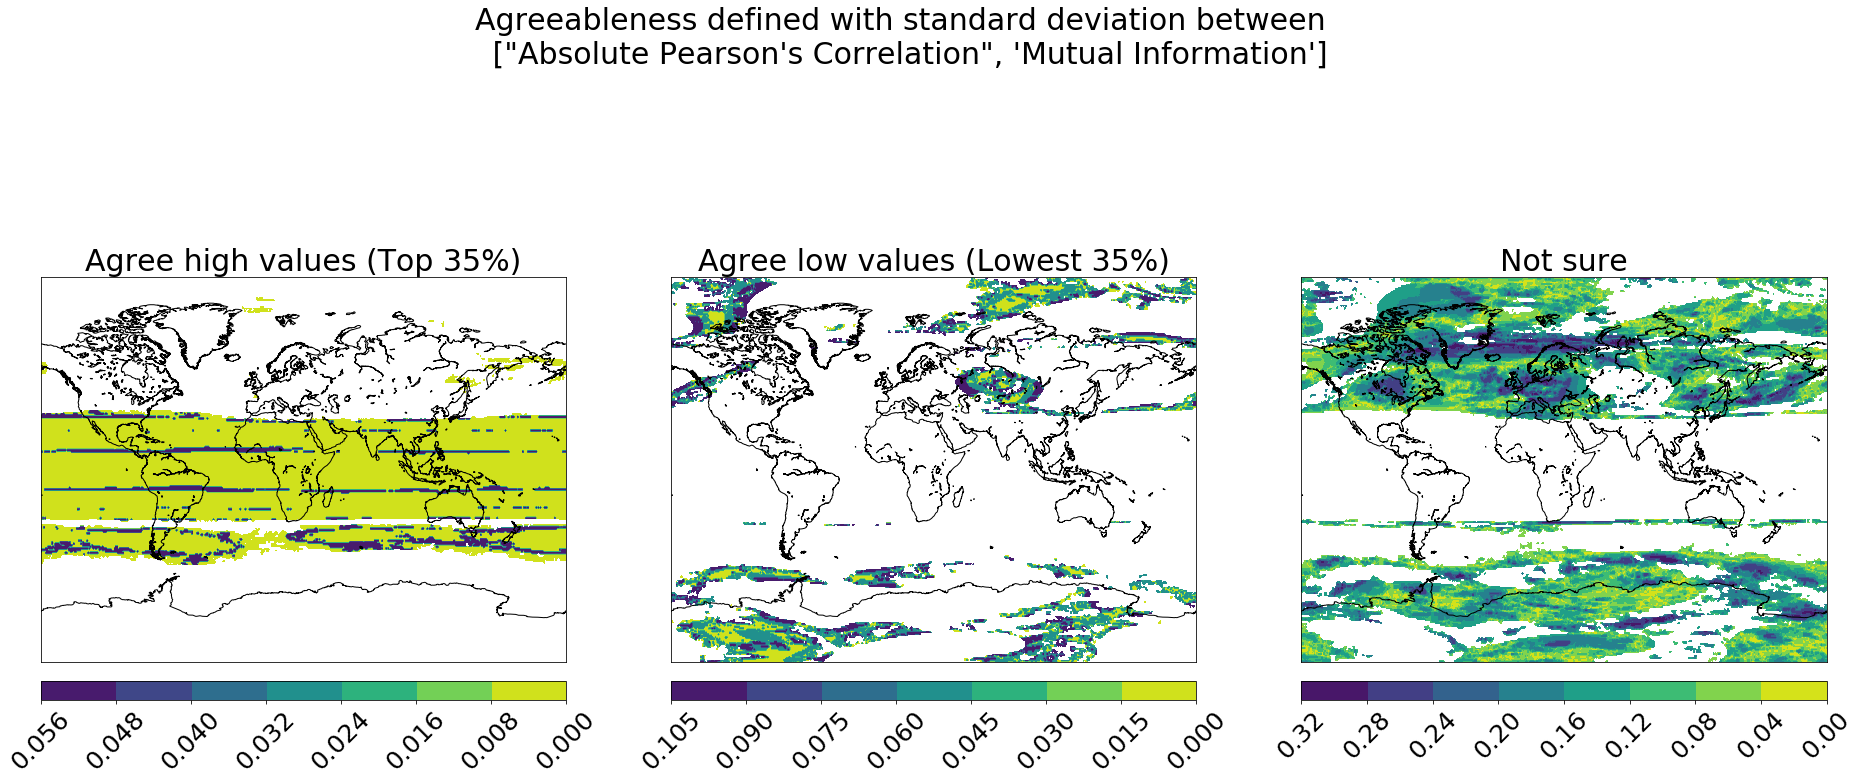

In [8]:
plots.plot_std_between_similarity_measures(u_l30, qbo_equator, measures, measure_labels)

<h1>Standard Deviation and Entropy between similarity values</h1>

In [9]:
print(plots.plot_entropy_between_similarity_measures.__doc__)


    Plot a map with the entropy between all similarity values, using a list of similarity measures, between
    the reference series and the time series for each point.

    Args:
        map_array (numpy.ndarray): Map with 4 dimensions - time, level, latitude, longitude
        reference_series (numpy.ndarray): 1 dimensional reference series
        measures (list): List of similarity measures to compute similarity between two time series
        labels (list): List of labels for the measures
        scaling_func (function, optional): Function that takes a map of similarity values and scales them in order
                                           to make the similarity values of different similarity measures comparable
            Defaults to comp.binning_values_to_quantiles
        level (int, optional): Level on which the similarity should be calculated
            Defaults to 0
    


C:\Users\tousp\Climate-Similarity-Metrics\plots.py:602: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m = Basemap(projection='mill', lon_0=30, resolution='l', ax=ax[i])


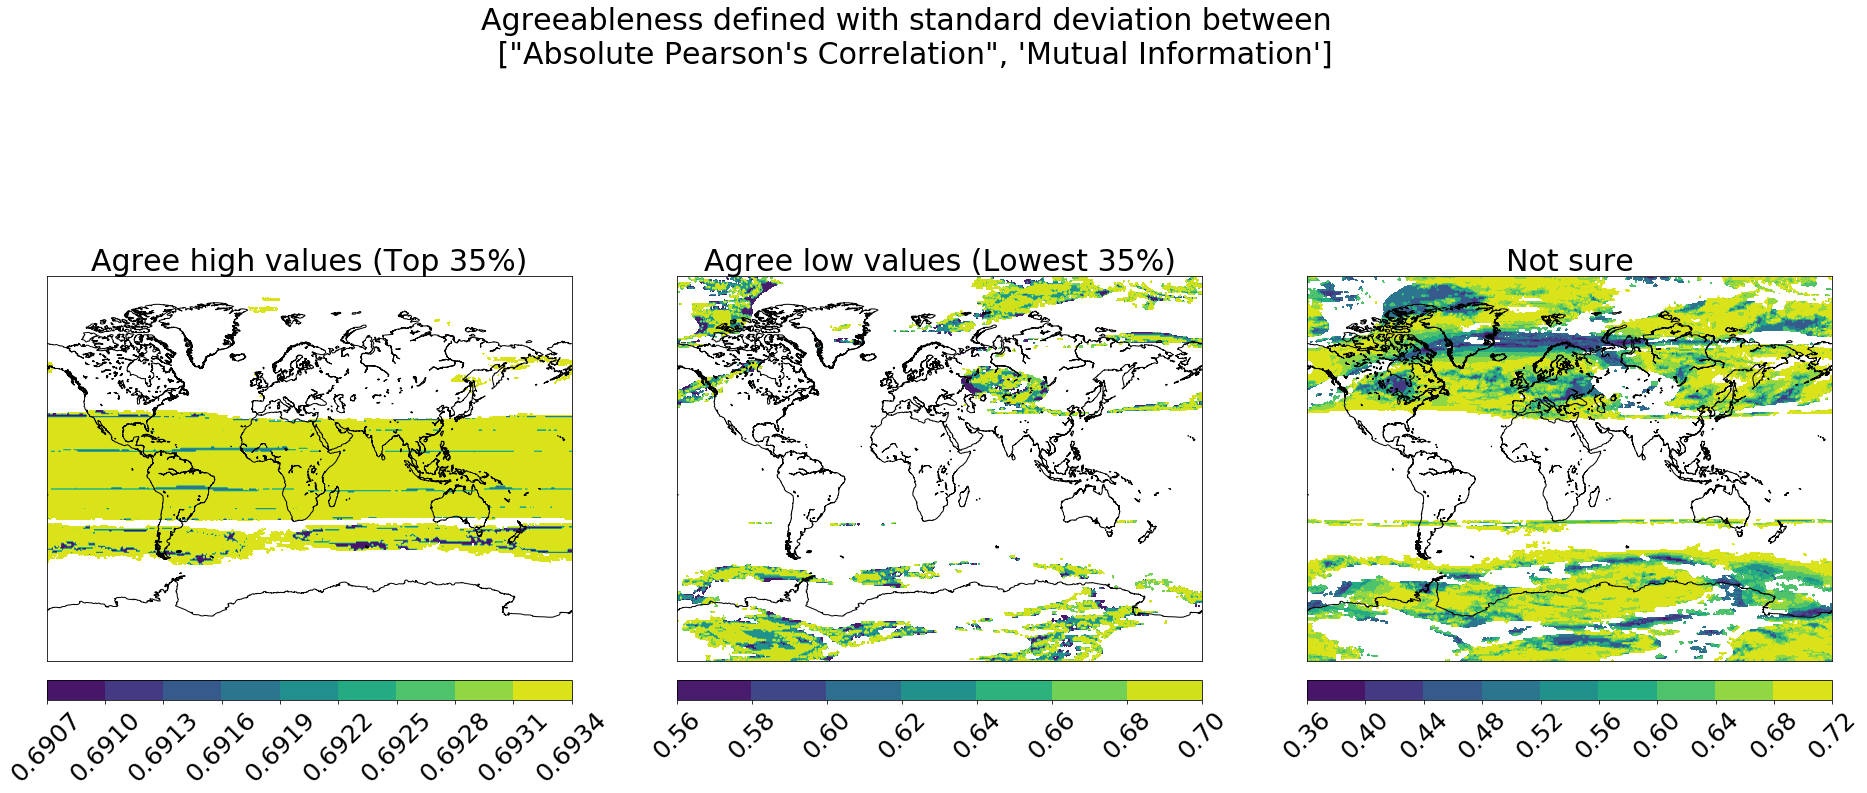

In [10]:
plots.plot_entropy_between_similarity_measures(u_l30, qbo_equator,  measures, measure_labels)